In [2]:
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset=pd.read_excel(r"D:\USA _store_sales.xlsx")

In [4]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
dataset.shape

(9426, 24)

In [6]:
# Checking for null values
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
# filling Null values with mean
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(),inplace=True)

In [8]:
# rechecking null values
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# ORDER PRIORITY

In [9]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [10]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [11]:
# data cleaning
dataset["Order Priority"]=dataset["Order Priority"].replace("Critical ","Critical")

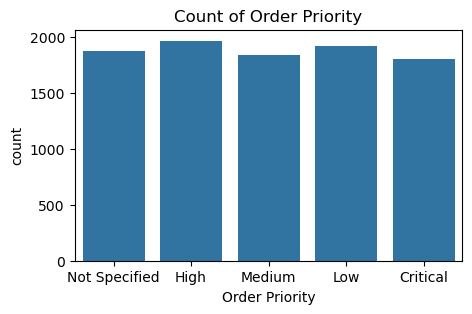

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.show()

# SHIP MODE

In [13]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [14]:
x = dataset["Ship Mode"].value_counts().index
y = dataset["Ship Mode"].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

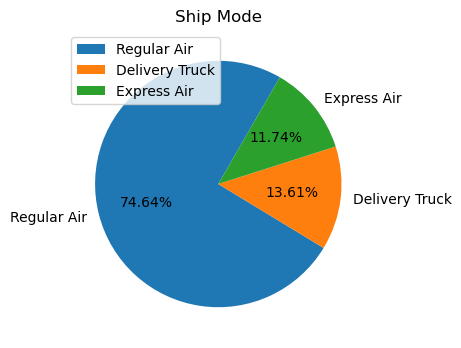

In [15]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.title("Ship Mode")
plt.show

From the above chart, we can sat that the highly used Shipping mode is Regular Air

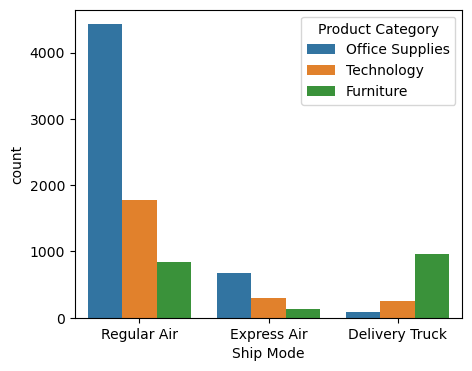

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset, hue="Product Category")
plt.show()

# CUSTOMER SEGMENT

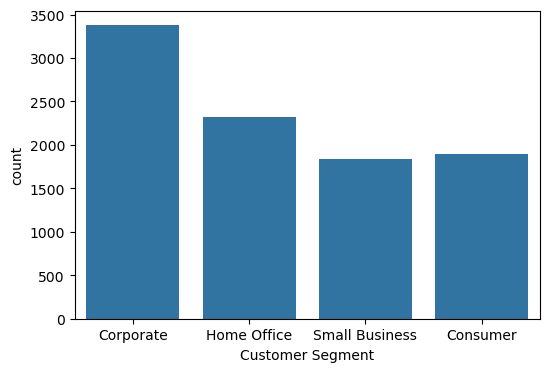

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Product Category

<function matplotlib.pyplot.show(close=None, block=None)>

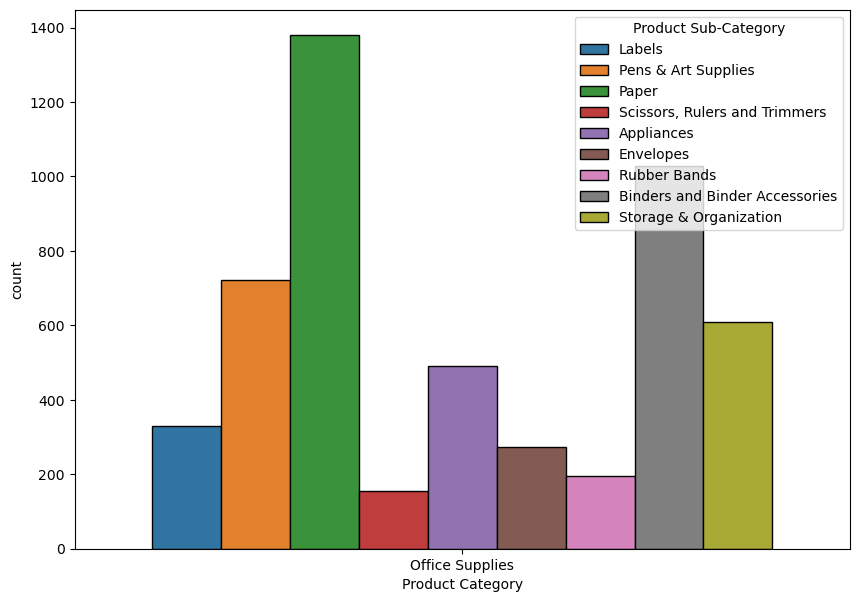

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"], hue="Product Sub-Category",edgecolor="black")
plt.show

In [19]:
dataset["Order year"]=dataset["Order Date"].dt.year

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [21]:
dataset["Order year"].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

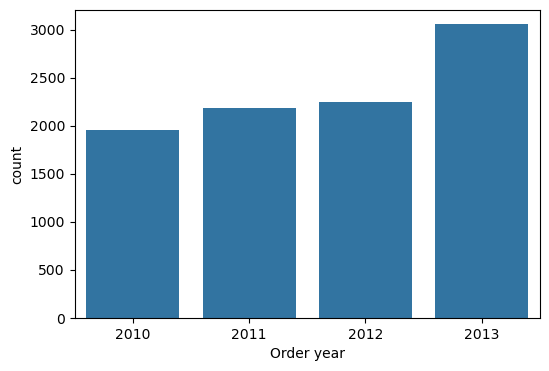

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order year",data=dataset)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

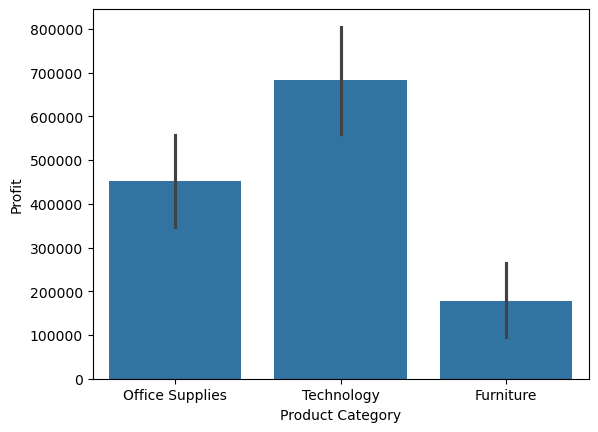

In [23]:
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator="sum")
plt.show

# Sales or Province

In [24]:
# Top five States/Province with highest sales
dataset["State or Province"].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Product Based Margin

<function matplotlib.pyplot.show(close=None, block=None)>

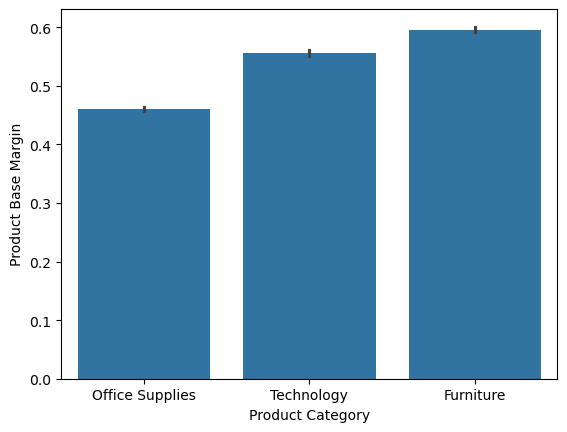

In [25]:
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator="sum")
plt.show